In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_fwf("brain_body.txt")

In [90]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [18]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [19]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [20]:
iqr = df['Body'].quantile(0.75) - df['Body'].quantile(0.25)
upper_threshold = df['Body'].quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df['Body'].quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print('The upper threshold is :',upper_threshold)
print('The lower threshold is :',lower_threshold)

The upper threshold is : 408.625
The lower threshold is : -238.375


<AxesSubplot:xlabel='Brain', ylabel='Body'>

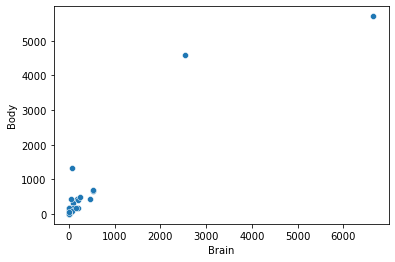

In [22]:
sns.scatterplot(x='Brain',y='Body',data=df)

In [71]:
x=df[['Brain']]
y=df['Body']


In [72]:
y

0      44.5
1      15.5
2       8.1
3     423.0
4     119.5
      ...  
57    169.0
58      2.6
59     11.4
60      2.5
61     50.4
Name: Body, Length: 62, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg=LinearRegression()

In [78]:
reg.fit(X_train,y_train)

LinearRegression()

In [79]:
print(reg.intercept_)

72.62705057879259


In [80]:
print(reg.coef_)

[1.32728047]


In [82]:
y_pred=reg.predict(X_test)

In [83]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
reg.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.7562575927281464


0.7562575927281464

In [89]:
##The R2-score has come to be 0.7562 which is a descent score
## linear regression equation is 1.32*Brain  + 72.62